In [ ]:
# utilities
import re
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from nltk.stem import WordNetLemmatizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from tqdm import tqdm
from collections import Counter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Data

In [ ]:
# Importing the dataset
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('/content/drive/MyDrive/CS 6120/Project/training.1600000.processed.noemoticon.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df.sample(5)

,target,ids,date,flag,user,text
1523163,4,2176538896,Mon Jun 15 04:08:22 PDT 2009,NO_QUERY,JeanCrous,@olixx sounds quite demanding
1583324,4,2190420532,Tue Jun 16 02:40:49 PDT 2009,NO_QUERY,david_miller,time to get in the shower and get all nice and...
547850,0,2202195848,Tue Jun 16 21:23:39 PDT 2009,NO_QUERY,missuermanda,@AgentParrilla what's wrong shaunza?
697436,0,2253816911,Sat Jun 20 08:47:17 PDT 2009,NO_QUERY,dbest2009,@madbrendan serious? What a jip! Spose it's tu...
721139,0,2261102570,Sat Jun 20 20:15:58 PDT 2009,NO_QUERY,marice23,Chatting with my friends. I miss them so much.


In [ ]:
data=df[['text','target']]

In [ ]:
data['target'] = data['target'].replace(4,1)

<ipython-input-121-54c9eb4fa536>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'] = data['target'].replace(4,1)


In [ ]:
data['target'].unique()

array([0, 1])

In [ ]:
dataset = data

In [ ]:
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]

In [ ]:
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]

In [ ]:
dataset = pd.concat([data_pos, data_neg])

# Cleaning Data

In [ ]:
dataset['text']=dataset['text'].str.lower()
dataset['text'].tail()

<ipython-input-124-cfdfd7510b56>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['text']=dataset['text'].str.lower()


1599995    just woke up. having no school is the best fee...
1599996    thewdb.com - very cool to hear old walt interv...
1599997    are you ready for your mojo makeover? ask me f...
1599998    happy 38th birthday to my boo of alll time!!! ...
1599999    happy #charitytuesday @thenspcc @sparkscharity...
Name: text, dtype: object

In [ ]:
dataset.shape

(1600000, 2)

In [ ]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [ ]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head()


<ipython-input-127-c1f31e612afa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))


0    @switchfoot http://twitpic.com/2y1zl - awww, t...
1    upset can't update facebook texting it... migh...
2    @kenichan dived many times ball. managed save ...
3                     whole body feels itchy like fire
4    @nationwideclass no, it's not behaving all. i'...
Name: text, dtype: object

In [ ]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()

<ipython-input-128-eef4fe1f8188>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))


1599995                  woke up no school best feeling ever
1599996    thewdbcom  cool hear old walt interviews â« h...
1599997                      ready mojo makeover ask details
1599998    happy 38th birthday boo alll time tupac amaru ...
1599999    happy charitytuesday thenspcc sparkscharity sp...
Name: text, dtype: object

In [ ]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()

<ipython-input-129-2587a2d701f4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))


1599995                  woke up no school best feeling ever
1599996    thewdbcom  cool hear old walt interviews â« h...
1599997                      ready mojo makeover ask details
1599998    happy 38th birthday boo alll time tupac amaru ...
1599999    happy charitytuesday thenspcc sparkscharity sp...
Name: text, dtype: object

In [ ]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()

<ipython-input-130-585aef627fe0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))


1599995                  woke up no school best feeling ever
1599996    thewdbcom  cool hear old walt interviews â« h...
1599997                      ready mojo makeover ask details
1599998    happy 38th birthday boo alll time tupac amaru ...
1599999    happy charitytuesday thenspcc sparkscharity sp...
Name: text, dtype: object

In [ ]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()

<ipython-input-131-dccce35b8388>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))


1599995                  woke up no school best feeling ever
1599996    thewdbcom  cool hear old walt interviews â« h...
1599997                      ready mojo makeover ask details
1599998    happy th birthday boo alll time tupac amaru sh...
1599999    happy charitytuesday thenspcc sparkscharity sp...
Name: text, dtype: object

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
dataset

,text,target
0,switchfoot httptwitpiccomzl a s bummer should...,0
1,upset cant update facebook texting it might cr...,0
2,kenichan dived many times ball managed save r...,0
3,whole body feels itchy like fire,0
4,nationwideclass no its not behaving all im mad...,0
...,...,...
1599995,woke up no school best feeling ever,1
1599996,thewdbcom cool hear old walt interviews â« h...,1
1599997,ready mojo makeover ask details,1
1599998,happy th birthday boo alll time tupac amaru sh...,1


In [ ]:
X=dataset.text
y=dataset.target

# Splitting Data into Train and Test Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)

In [ ]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

No. of feature_words:  251318


# K-Means

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X_train)

In [ ]:
pred = kmeans.predict(X_train)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, pred, target_names=['Negative Sentiment','Positive Sentiment']))

                    precision    recall  f1-score   support

Negative Sentiment       0.61      0.14      0.23     19009
Positive Sentiment       0.51      0.91      0.66     18991

          accuracy                           0.53     38000
         macro avg       0.56      0.53      0.44     38000
      weighted avg       0.56      0.53      0.44     38000



In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,pred))

0.5250789473684211


In [ ]:
X_train

<38000x251318 sparse matrix of type '<class 'numpy.float64'>'
	with 567372 stored elements in Compressed Sparse Row format>

In [ ]:
dataset[:1001]

,text,target
800000,love healthuandpets u guys r best,1
800001,im meeting one besties tonight cant wait girl...,1
800002,darealsunisakim thanks twitter add sunisa got ...,1
800003,sick really cheap hurts much eat real food plu...,1
800004,lovesbrooklyn effect everyone,1
...,...,...
800996,ireporter answer sent dm try,1
800997,brooklynunion cuz ur pm am id either asleep ai...,1
800998,littrellfans good figured would like know,1
800999,nicolerichie yea remember,1


# Subset of Data to perform Dimensionality Reduction Techniques

In [ ]:
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]
data_pos = data_pos.iloc[:int(1000)]
data_neg = data_neg.iloc[:int(1000)]
dataset = pd.concat([data_pos, data_neg])
dataset['text']=dataset['text'].str.lower()
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))

In [ ]:
X=dataset.text
y=dataset.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state =26105111)
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

No. of feature_words:  13642


# PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pd.DataFrame(pca.fit_transform(X_train.toarray()))

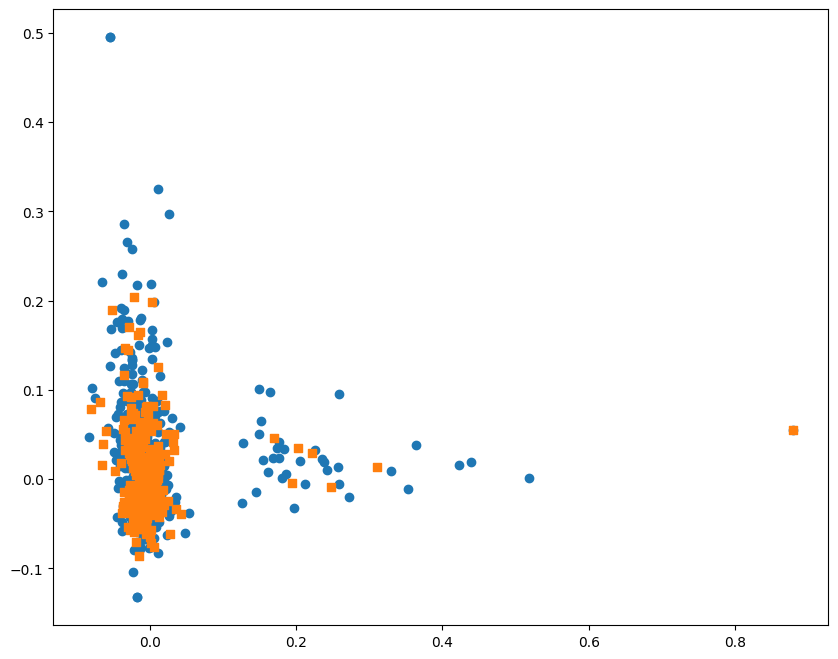

In [ ]:
fig,ax = plt.subplots(figsize=(10,8))

ax.scatter(X_pca[0][:1000], X_pca[1][:1000], marker='o', label='University')
ax.scatter(X_pca[0][1001:2001],X_pca[1][1001:2001], marker='s', label='Cycling')


In [ ]:
from sklearn.manifold import TSNE
X_tsne = pd.DataFrame(TSNE(n_components=2, perplexity=5, random_state=42, init='random').fit_transform(X_train))

In [ ]:
X_tsne

,0,1
0,24.179646,64.284798
1,66.665710,12.627051
2,-21.231083,28.625322
3,13.416057,76.322571
4,-47.737270,-30.954201
...,...,...
1395,-4.980526,-42.135933
1396,-9.467545,25.611103
1397,45.975548,37.664703
1398,14.251211,-1.008904


# t-SNE

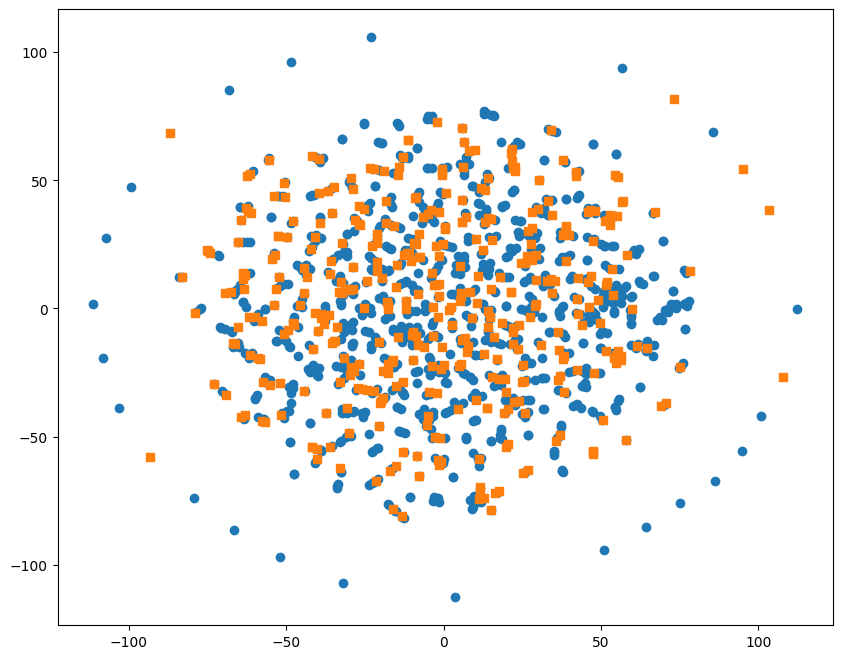

In [ ]:
fig1,ax1 = plt.subplots(figsize=(10,8))

ax1.scatter(X_tsne[0][:1000], X_tsne[1][:1000], marker='o', label='University')
ax1.scatter(X_tsne[0][1001:2001],X_tsne[1][1001:2001], marker='s', label='Cycling')

## Classification Metrics after Implementing PCA on data and using K-Means:

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X_pca)
pred = kmeans.predict(X_pca)
from sklearn.metrics import classification_report
print(classification_report(y_train, pred, target_names=['Negative Sentiment','Positive Sentiment']))
print(accuracy_score(y_train,pred))

                    precision    recall  f1-score   support

Negative Sentiment       0.50      0.96      0.66       706
Positive Sentiment       0.30      0.02      0.03       694

          accuracy                           0.49      1400
         macro avg       0.40      0.49      0.34      1400
      weighted avg       0.40      0.49      0.35      1400

0.4928571428571429


## Classification Metrics after Implementing t-SNE on data and using K-Means:

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X_tsne)
pred = kmeans.predict(X_tsne)
from sklearn.metrics import classification_report
print(classification_report(y_train, pred, target_names=['Negative Sentiment','Positive Sentiment']))
print(accuracy_score(y_train,pred))

                    precision    recall  f1-score   support

Negative Sentiment       0.49      0.48      0.49       706
Positive Sentiment       0.48      0.49      0.49       694

          accuracy                           0.49      1400
         macro avg       0.49      0.49      0.49      1400
      weighted avg       0.49      0.49      0.49      1400

0.48714285714285716


## Classification Metrics after Implementing t-SNE on data and using Hierarchical Clustering:

In [ ]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering().fit(X_tsne)
pred = clustering.labels_
from sklearn.metrics import classification_report
print(classification_report(y_train, pred, target_names=['Negative Sentiment','Positive Sentiment']))
print(accuracy_score(y_train,pred))

                    precision    recall  f1-score   support

Negative Sentiment       0.50      0.56      0.53       706
Positive Sentiment       0.49      0.42      0.45       694

          accuracy                           0.49      1400
         macro avg       0.49      0.49      0.49      1400
      weighted avg       0.49      0.49      0.49      1400

0.49142857142857144


## Classification Metrics after Implementing PCA on data and using Hierarchical Clustering:

In [ ]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering().fit(X_pca)
pred = clustering.labels_
from sklearn.metrics import classification_report
print(classification_report(y_train, pred, target_names=['Negative Sentiment','Positive Sentiment']))
print(accuracy_score(y_train,pred))

                    precision    recall  f1-score   support

Negative Sentiment       0.50      0.96      0.66       706
Positive Sentiment       0.29      0.02      0.03       694

          accuracy                           0.49      1400
         macro avg       0.40      0.49      0.34      1400
      weighted avg       0.40      0.49      0.35      1400

0.49214285714285716


# Lexicon Based Approach:

In [ ]:
dataset

,text,target,vader_polarity,blob_polarity,blob,vader
800000,love healthuandpets u guys r best,1,0.8555,0.750000,1,1
800001,im meeting one besties tonight cant wait girl ...,1,0.0000,0.000000,0,0
800002,darealsunisakim thanks twitter add sunisa got ...,1,0.8020,0.200000,1,1
800003,sick really cheap hurts much eat real food plu...,1,-0.5542,0.021429,1,0
800004,lovesbrooklyn effect everyone,1,0.0000,0.000000,0,0
...,...,...,...,...,...,...
19995,not much time off weekend work trip malmï¿½ fr...,0,0.6597,0.300000,1,1
19996,one day holidays,0,0.3818,0.000000,0,1
19997,feeling right hate damn humprey,0,-0.7096,-0.257143,0,0
19998,geezi hv read whole book personality types emb...,0,0.2732,0.025000,1,1


## VADER Library

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

dataset['vader_polarity'] = dataset['text'].map(
    lambda text: sid.polarity_scores(text)['compound'])  

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
<ipython-input-134-e0a88788330e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['vader_polarity'] = dataset['text'].map(


In [ ]:
dataset

,text,target,vader_polarity
0,switchfoot httptwitpiccomzl a s bummer should...,0,-0.3818
1,upset cant update facebook texting it might cr...,0,-0.7269
2,kenichan dived many times ball managed save r...,0,0.4939
3,whole body feels itchy like fire,0,-0.2500
4,nationwideclass no its not behaving all im mad...,0,-0.6597
...,...,...,...
1599995,woke up no school best feeling ever,1,0.5423
1599996,thewdbcom cool hear old walt interviews â« h...,1,0.3182
1599997,ready mojo makeover ask details,1,0.3612
1599998,happy th birthday boo alll time tupac amaru sh...,1,0.5719


## TextBlob Library

In [ ]:
from textblob import TextBlob

dataset['blob_polarity'] = dataset['text'].map(
    lambda text: TextBlob(text).sentiment.polarity)

<ipython-input-136-40a35d77bd85>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['blob_polarity'] = dataset['text'].map(


In [ ]:
dataset

,text,target,vader_polarity,blob_polarity
0,switchfoot httptwitpiccomzl a s bummer should...,0,-0.3818,0.000
1,upset cant update facebook texting it might cr...,0,-0.7269,0.000
2,kenichan dived many times ball managed save r...,0,0.4939,0.500
3,whole body feels itchy like fire,0,-0.2500,0.200
4,nationwideclass no its not behaving all im mad...,0,-0.6597,-0.625
...,...,...,...,...
1599995,woke up no school best feeling ever,1,0.5423,1.000
1599996,thewdbcom cool hear old walt interviews â« h...,1,0.3182,0.225
1599997,ready mojo makeover ask details,1,0.3612,0.200
1599998,happy th birthday boo alll time tupac amaru sh...,1,0.5719,0.800


In [ ]:
dataset['blob']= dataset['blob_polarity'].apply(lambda x: 1 if x > 0 else 0) #Assigning 1 if Positive else 0
dataset['vader']= dataset['vader_polarity'].apply(lambda x: 1 if x > 0 else 0) #Assigning 1 if Positive else 0

<ipython-input-138-81ba7d9886a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['blob']= dataset['blob_polarity'].apply(lambda x: 1 if x > 0 else 0)


## TextBlob Results

In [ ]:
print(classification_report(dataset['target'], dataset['blob'], target_names=['Negative Sentiment','Positive Sentiment']))
print(accuracy_score(dataset['target'],dataset['blob']))

                    precision    recall  f1-score   support

Negative Sentiment       0.61      0.71      0.65    800000
Positive Sentiment       0.65      0.54      0.59    800000

          accuracy                           0.62   1600000
         macro avg       0.63      0.62      0.62   1600000
      weighted avg       0.63      0.62      0.62   1600000

0.623661875


## VADER Results

In [ ]:
print(classification_report(dataset['target'], dataset['vader'], target_names=['Negative Sentiment','Positive Sentiment']))
print(accuracy_score(dataset['target'],dataset['vader']))

                    precision    recall  f1-score   support

Negative Sentiment       0.64      0.68      0.66    800000
Positive Sentiment       0.66      0.61      0.63    800000

          accuracy                           0.65   1600000
         macro avg       0.65      0.65      0.65   1600000
      weighted avg       0.65      0.65      0.65   1600000

0.64659625
